# Effect Size Comparison
This notebook will examine how well fit effect sizes compare to the test-based effect sizes for parametric data.

In [1]:
import os
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
import statsmodels.api as sms
import statsmodels.formula.api as smf

import emp_power.traditional as trad
import emp_power.effects as eff

% matplotlib inline
sn.set_style('ticks')

In [2]:
num_rounds = 100
alpha = 0.05
tests = ['ttest_ind']
counts = np.arange(5, 100, 10)
overwrite = True

In [3]:
sim_location = './simulations/'
if not os.path.exists(sim_location):
    raise ValueError('The simulations do not exist. Go back and simulate some data!')

In [4]:
tests = ['ttest_ind', 'ttest_1', 'anova_3', 'anova_8', 'correlation']

In [5]:
def calc_power_summary(counts, power, alpha=0.05):
    """Calculates"""
    # Calculates the effect size vectors
    eff_z = eff.z_effect(counts, trad_power, alpha=alpha)
    eff_t = eff.t_effect(counts, trad_power, alpha=alpha)
    eff_f = eff.f_effect(counts, trad_power, alpha=alpha)
    
    return (eff_z, eff_t, eff_f)

In [24]:
summary = {}
for test_name in tests:
    summary[test_name] = {}
    
    # Checks the directory location
    power_dir = os.path.join(sim_location, 'emperical_power/%s' % test_name)
    save_dir = os.path.join(sim_location, 'extrapolated_effect/%s' % test_name)
    
    # Creates the save directory
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    # Looks at the simulations
    for i in range(num_rounds):
        power_fp = os.path.join(power_dir, 'simulation_%i.p' % i)
        save_fp = os.path.join(save_dir, 'simulation_%i.p' % i)
        
        if os.path.exists(save_fp) and not overwrite:
            with open(save_fp, 'rb') as f_:
                summary[test_name][i] = pickle.load(f_)
            continue
        
        with open(power_fp, 'rb') as f_:
            power_sim = pickle.load(f_)
        trad_power = power_sim['traditional_power']
        emp_power = power_sim['emperical_power']
        try:
            counts = data['counts']
        except:
            counts = np.arange(5, 100, 10)
        
        (teff_z, teff_t, teff_f) = calc_power_summary(counts, trad_power)
        (eeff_z, eeff_t, eeff_f) = calc_power_summary(counts, emp_power)
        
        trad_summary = {'counts': counts,
                        'index': np.arange(len(counts)),
                        'trad_power': trad_power,
                        'empr_power': emp_power,
                        'dummy': i * np.ones(len(counts)).astype(int),
                        'trad_f_effect': teff_f[0],
                        'trad_t_effect': teff_t[0],
                        'trad_z_effect': teff_z[0],
                        'empr_f_effect': eeff_f[0],
                        'empr_t_effect': eeff_t[0],
                        'empr_z_effect': eeff_z[0],
                        }
        summary[test_name][i] = trad_summary
        
        with open(save_fp, 'wb') as f_:
            pickle.dump(trad_summary, f_)

Let's start by looking at the effect sizes calculated from the traditionally calculated power.

In [43]:
def plot_test_features(test_name, ax_r):
    """Creates a helper function to make plotting prettier"""
    [ax1, ax2, ax3] = ax_r
    test_data = pd.DataFrame(summary[test_name]).transpose()
    test_sum = pd.DataFrame(
        data=[np.hstack(test_data['trad_f_effect']),
              np.hstack(test_data['trad_t_effect']),
              np.hstack(test_data['trad_z_effect']),
              np.hstack(test_data['trad_power']),],
        columns=[(a, b) for a, b in 
                 zip(*[np.hstack(test_data['dummy']), np.hstack(test_data['index'])])],
        index=['f_effect', 't_effect', 'z_effect', 'power']
        ).transpose()
    test_sum.dropna(inplace=True)
    ax_r = axes[0]
    [ax1, ax2, ax3] = ax_r
    ax1.plot(test_sum['f_effect'], test_sum['t_effect'], 'k.', alpha=0.1)
    ax2.plot(test_sum['f_effect'], test_sum['z_effect'], 'k.', alpha=0.1)
    ax3.plot(test_sum['t_effect'], test_sum['z_effect'], 'k.', alpha=0.1)

    def clean_up_ax(ax):
        ax.plot([0, 1.5], [0, 1.5], 'r-')
        ax.set_xticks(np.arange(0, 1.51, 0.25))
        ax.set_yticks(np.arange(0, 1.51, 0.25))
        ax.set_xticklabels('')
        ax.set_yticklabels('')
        ax.set_xlim([0, 1.5])
        ax.set_ylim([0, 1.5])
    clean_up_ax(ax1)
    clean_up_ax(ax2)
    clean_up_ax(ax3)

In [45]:
tests

['ttest_ind', 'ttest_1', 'anova_3', 'anova_8', 'correlation']

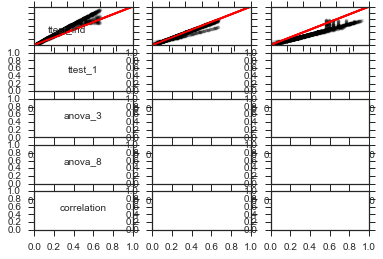

In [47]:
fig, axes = plt.subplots(5, 3)
# fig.set_size_inches(4.5, 7.5)
# sn.despine()

for test_name, ax_r in zip(*(tests, axes)):
    [ax1, ax2, ax3] = ax_r
    ax1.text(0.5, 0.5, test_name, ha='center')
    plot_test_features(test_name, ax_r)
    

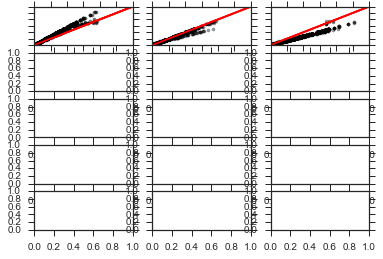

In [42]:
test_name = 'ttest_ind'
test_data = pd.DataFrame(summary[test_name]).transpose()
test_sum = pd.DataFrame(
    data=[np.hstack(test_data['trad_f_effect']),
          np.hstack(test_data['trad_t_effect']),
          np.hstack(test_data['trad_z_effect']),
          np.hstack(test_data['trad_power']),],
    columns=[(a, b) for a, b in 
             zip(*[np.hstack(test_data['dummy']), np.hstack(test_data['index'])])],
    index=['f_effect', 't_effect', 'z_effect', 'power']
    ).transpose()
test_sum.dropna(inplace=True)
ax_r = axes[0]
[ax1, ax2, ax3] = ax_r
ax1.plot(test_sum['f_effect'], test_sum['t_effect'], 'k.', alpha=0.1)
ax2.plot(test_sum['f_effect'], test_sum['z_effect'], 'k.', alpha=0.1)
ax3.plot(test_sum['t_effect'], test_sum['z_effect'], 'k.', alpha=0.1)

def clean_up_ax(ax):
    ax.plot([0, 1.5], [0, 1.5], 'r-')
    ax.set_xticks(np.arange(0, 1.51, 0.25))
    ax.set_yticks(np.arange(0, 1.51, 0.25))
    ax.set_xticklabels('')
    ax.set_yticklabels('')
    ax.set_xlim([0, 1.5])
    ax.set_ylim([0, 1.5])
clean_up_ax(ax1)
clean_up_ax(ax2)
clean_up_ax(ax3)

fig

In [ ]:
test = pd.DataFrame(data=[np.hstack(ttest['trad_f_effect']),
                          np.hstack(ttest['trad_t_effect']),
                          np.hstack(ttest['trad_z_effect']),
                          np.hstack(ttest['trad_power']),
                         ],
                     columns=[(a, b) for a, b in 
                              zip(*[np.hstack(ttest['dummy']), 
                                    np.hstack(ttest['index'])])],
                     index=['f_effect', 't_effect', 'z_effect', 'power']
                    ).transpose()

In [ ]:
test.dropna(inplace=True)

In [ ]:
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2)
ax1.plot(test['f_effect'], test['t_effect'], 'ko', alpha=0.05)
ax1.plot([0, 1.5], [0, 1.5], 'r-')
ax2.plot(test['z_effect'], test['t_effect'], 'ko', alpha=0.05)
ax2.plot([0, 1.5], [0, 1.5], 'r-')
ax3.plot(test['f_effect'], test['z_effect'], 'ko', alpha=0.05)
ax3.plot([0, 1.5], [0, 1.5], 'r-')


ax1.set_xticks(np.arange(0, 1.51, 0.5))
ax2.set_xticks(np.arange(0, 1.51, 0.5))
ax3.set_xticks(np.arange(0, 1.51, 0.5))
ax1.set_yticks(np.arange(0, 1.51, 0.5))
ax2.set_yticks(np.arange(0, 1.51, 0.5))
ax3.set_yticks(np.arange(0, 1.51, 0.5))
ax1.set_xlim([0, 1.5])
ax2.set_xlim([0, 1.5])
ax3.set_xlim([0, 1.5])
ax1.set_ylim([0, 1.5])
ax2.set_ylim([0, 1.5])
ax3.set_ylim([0, 1.5])
ax4.set_visible(False)
fig.set_size_inches((4, 4))

In [ ]:
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2)
f_t_reg = smf.ols(formula='f_effect ~ t_effect', data=test).fit()
ax1.plot(test['f_effect'], np.absolute(f_t_reg.resid), 'ko', alpha=0.1)
ax2.plot(np.log10(test['power']), np.absolute(f_t_reg.resid), 'ko', alpha=0.1)
ax4.plot(np.log10(1-test['power']), np.absolute(f_t_reg.resid), 'ko', alpha=0.1)

It looks like power values about about 0.999 don't behave well. So, we should exclude hose 

In [ ]:
f_t_reg.resid

In [ ]:
f_t_reg.summary()